#AAISHA SIDDIQAH

#Detect Heart Disease using patient data.

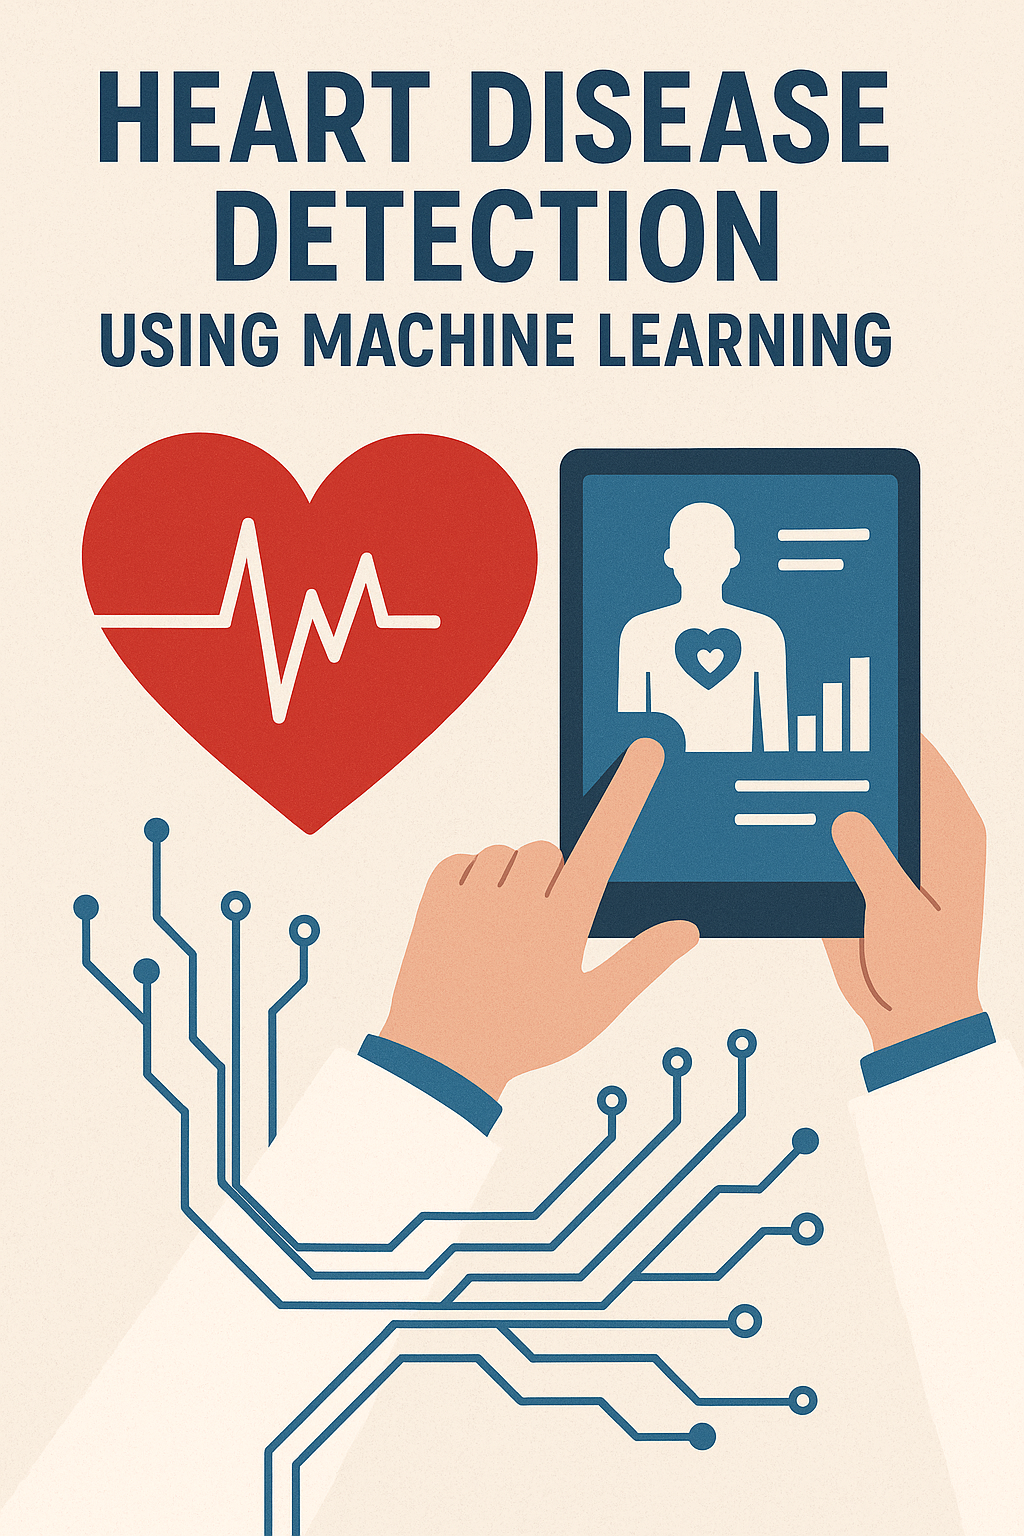

Objective:

Build a system that can predict if a patient has heart disease. Explore the data, understand the features, and figure out an approach.

Dataset:

This dataset contains data about patient vitals and heart disease(if any) of the same.

Description of columns:

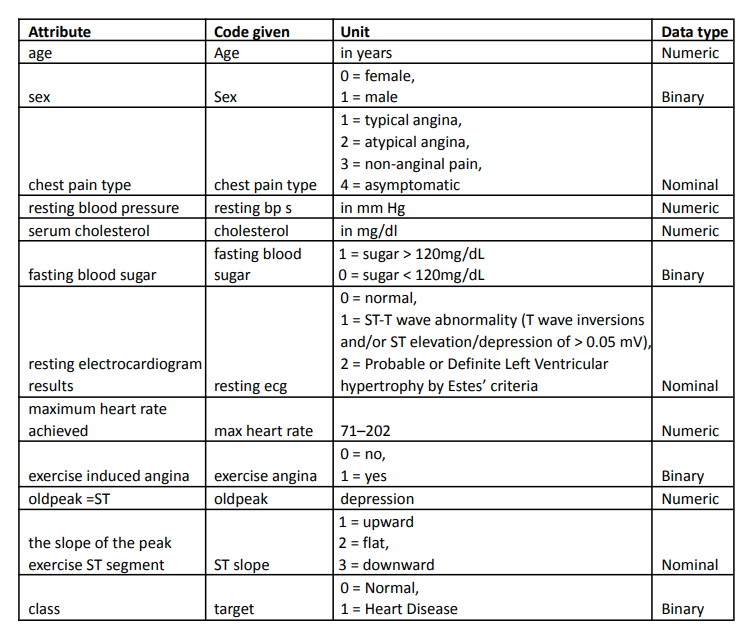


# Step 1: Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


# Step 2: Load Dataset

In [ ]:
# Load the CSV file (replace filename accordingly)
df = pd.read_csv("dataset.csv")

# Step 3: Basic Data Exploration

In [ ]:
df.head()
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


,0
age,0
sex,0
chest pain type,0
resting bp s,0
cholesterol,0
fasting blood sugar,0
resting ecg,0
max heart rate,0
exercise angina,0
oldpeak,0


# Step 4: Data Preprocessing

In [ ]:
# Check unique values for nominal/binary columns
for col in ['sex', 'chest pain type', 'fasting blood sugar', 'resting ecg', 'exercise angina', 'ST slope', 'target']:
    print(f"{col}: {df[col].unique()}")

# Rename columns if needed for consistency
df.columns = [col.lower().replace(" ", "_") for col in df.columns]

# Separate features and target
X = df.drop("target", axis=1)
y = df["target"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


sex: [1 0]
chest pain type: [2 3 4 1]
fasting blood sugar: [0 1]
resting ecg: [0 1 2]
exercise angina: [0 1]
ST slope: [1 2 3 0]
target: [0 1]


# Step 5: Split Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Step 6: Train Model

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Step 7: Evaluate Model

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       107
           1       0.95      0.96      0.95       131

    accuracy                           0.95       238
   macro avg       0.95      0.95      0.95       238
weighted avg       0.95      0.95      0.95       238

Confusion Matrix:


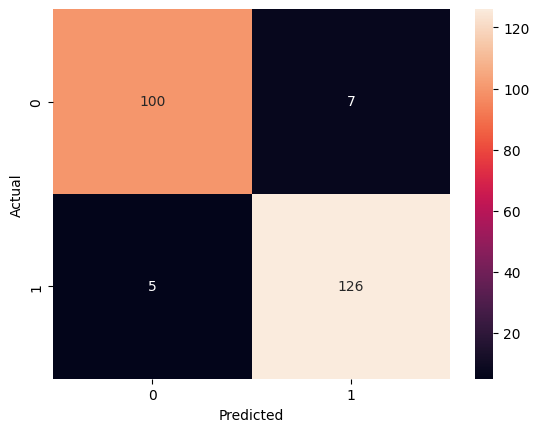

In [ ]:
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Supercharge the heart disease prediction system by:

i)Trying multiple ML models

ii)Tuning them using GridSearchCV

iii)Reducing dimensionality using PCA and Feature Importance

# Step 1: Try Other Models

In [ ]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       107
           1       0.87      0.88      0.87       131

    accuracy                           0.86       238
   macro avg       0.86      0.86      0.86       238
weighted avg       0.86      0.86      0.86       238



In [ ]:
#K-Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("K-Nearest Neighbors:")
print(classification_report(y_test, y_pred_knn))


K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       107
           1       0.87      0.93      0.90       131

    accuracy                           0.89       238
   macro avg       0.89      0.88      0.88       238
weighted avg       0.89      0.89      0.89       238



# Step 2: GridSearchCV for Hyperparameter Tuning

In [ ]:
#Random Forest Tuning

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

print("Best Parameters (Random Forest):", grid_rf.best_params_)
print("Best Score:", grid_rf.best_score_)


Best Parameters (Random Forest): {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 150}
Best Score: 0.9064866354367593


In [ ]:
#KNN Tuning

param_grid_knn = {
    'n_neighbors': list(range(1, 21)),
    'weights': ['uniform', 'distance']
}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)

print("Best Parameters (KNN):", grid_knn.best_params_)
print("Best Score:", grid_knn.best_score_)


Best Parameters (KNN): {'n_neighbors': 19, 'weights': 'distance'}
Best Score: 0.9064645907963627


# Step 3: PCA (Principal Component Analysis)

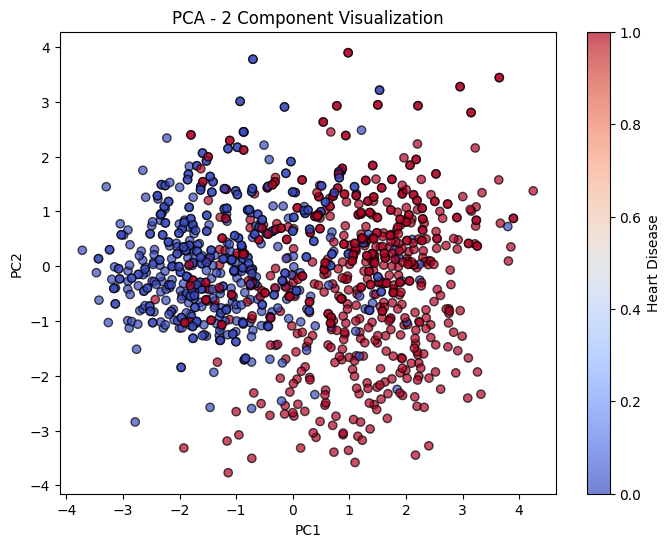

In [ ]:
from sklearn.decomposition import PCA

# Reduce to 2 principal components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.title("PCA - 2 Component Visualization")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label='Heart Disease')
plt.show()


# Step 4: Feature Importance (Random Forest Based)

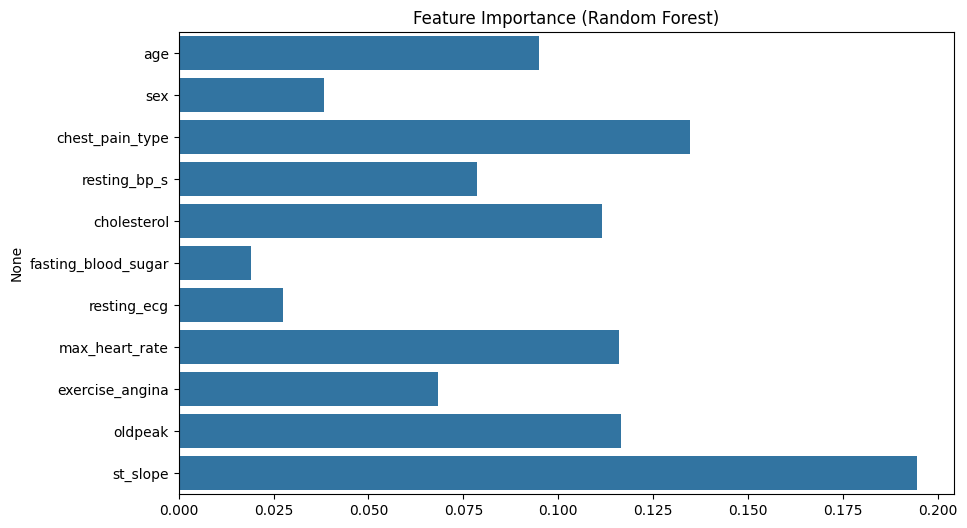

In [ ]:
# Fit Random Forest again
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Plot Feature Importances
importances = rf.feature_importances_
features = df.drop('target', axis=1).columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance (Random Forest)")
plt.show()